###### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Binary Distillation with McCabe-Thiele

This [IPython notebook](http://ipython.org/notebook.html) illustrates the the design of binary distillation columns using the McCabe-Thiele graphical technique.

In [1]:
#Initializations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Statement

A chemicals plant receives a 500 kg-mol/hour stream containing 60 mol% n-heptane, 
40 mol% n-octane from a nearby refinery. The stream is available as a saturated 
liquid at 2 atmospheres. The plant operator needs to separate 
the mixture such that one product stream is 95 mol % pure n-octane, and that 95% of the 
n-octane is recovered.

## Distillation

<div style="float: right; margin: 10px; width: 200px; font-size: 80%; line-height: 120%;">
<a href="http://commons.wikimedia.org/wiki/File:Colonne_distillazione.jpg#/media/File:Colonne_distillazione.jpg">
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Colonne_distillazione.jpg/1200px-Colonne_distillazione.jpg" alt="Colonne distillazione.jpg">
</a><br>
by <a href="//commons.wikimedia.org/wiki/User:Luigi_Chiesa" title="User:Luigi Chiesa">User:Luigi Chiesa</a>. Licensed under <a href="http://creativecommons.org/licenses/by/3.0" title="Creative Commons Attribution 3.0">CC BY 3.0</a> via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.
</div>
Distillation is a workhorse for the large-scale separation of homogeneous volatile mixtures, such as the n-heptane/n-octane mixture described in the problem. Distillation exploits the difference in volatility among components of the mixture. 



## Txy Diagram

Can the desired product purity be accomplished in a single flash drum? Show why or why not using a Txy diagram.

### Chemical Property Data

We begin the analysis by gathering Antoine equation data to create functions that compute the saturation pressure for n-heptane and n-octane. This data comes from Appendix B of the Murphy textbook with units of temperature in &deg;C and pressure in mmHg.

In [2]:
Psat = dict()
Psat['n-heptane'] = lambda T: 10**(6.89677 -  1264.90/(T +  216.54))
Psat['n-octane'] = lambda T: 10**(6.91868 - 1351.99/(T + 209.15))

The saturation temperatures (i.e, boiling points) can be computed by solving Antoine's equation for temperature. Next we create functions for each species for which we have specified a Psat function. This is more general than is really needed for the problem, but might be useful in other situations.

In [3]:
from scipy.optimize import fsolve

Tsat = dict()
for s in Psat.keys():
    Tsat[s] = lambda P, s=s: fsolve(lambda T: Psat[s](T)-P,50)[0]

### Construct Txy Diagram

Next we compute the lower and upper bound on temperatures for the Txy diagram.

In [5]:
A = 'n-heptane'
B = 'n-octane'
P = 2*760;

print "{:12s}  {:.1f} deg C".format(A,Tsat[A](P))
print "{:12s}  {:.1f} deg C".format(B,Tsat[B](P))

T = np.linspace(Tsat[A](P),Tsat[B](P))

n-heptane     124.0 deg C
n-octane      152.7 deg C


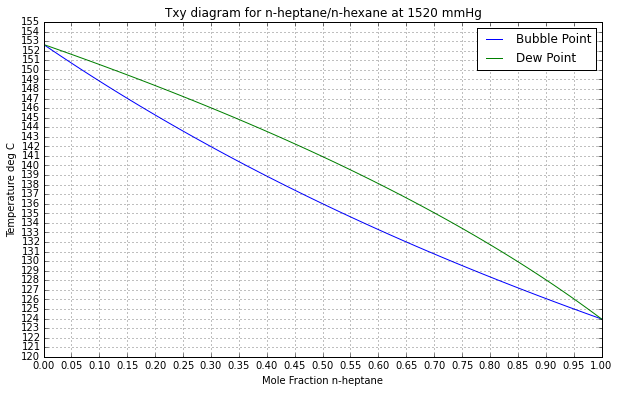

In [8]:
x = lambda T: (P-Psat[B](T))/(Psat[A](T)-Psat[B](T))
y = lambda T: x(T)*Psat[A](T)/P

plt.figure(figsize=(10,6))

plt.plot(map(x,T),T,map(y,T),T)
plt.xlabel('Mole Fraction n-heptane')
plt.ylabel('Temperature deg C')
plt.title('Txy diagram for n-heptane/n-hexane at 1520 mmHg')
plt.legend(['Bubble Point','Dew Point'])
plt.grid()

plt.ylim(120,155)
plt.xlim(0,1)
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(120,155,36));

### Analysis

The problem asked if the purity specification for the n-octane stream can be met in a single stage flash drum. The feed concentration of n-heptane is 60 mol%.  The desired n-octane product would have an n-heptane concentration of 5 mol%. For the given feed, we see the minimum possible concentration of n-heptane would be at the dew point of approximate 138 &deg;C, yielding a liquid phase composition of about 43 mol% n-heptane, and 57 mol% n-octane. This is far short of the stream specification.

The following cell provides supporting calculations.

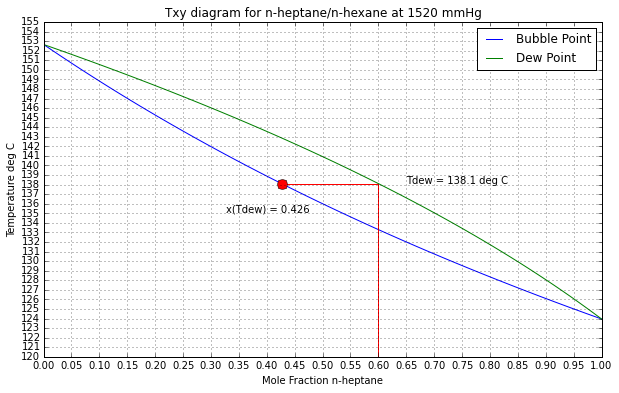

In [10]:
x = lambda T: (P-Psat[B](T))/(Psat[A](T)-Psat[B](T))
y = lambda T: x(T)*Psat[A](T)/P

plt.figure(figsize=(10,6))

plt.plot(map(x,T),T,map(y,T),T)
plt.xlabel('Mole Fraction n-heptane')
plt.ylabel('Temperature deg C')
plt.title('Txy diagram for n-heptane/n-hexane at 1520 mmHg')
plt.legend(['Bubble Point','Dew Point'])
plt.grid()

plt.ylim(120,155)
plt.xlim(0,1)
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(120,155,36));

Tdew = fsolve(lambda T: y(T)-0.60, 138)
ax = plt.axis()
plt.plot([0.6,0.6,x(Tdew)],[ax[2],Tdew,Tdew],'r-')
plt.plot(x(Tdew),Tdew,'ro',ms=10)
plt.text(0.6+0.05,Tdew,'Tdew = {:5.1f} deg C'.format(float(Tdew)))
plt.text(x(Tdew)-.1,Tdew-3,'x(Tdew) = {:5.3f}'.format(float(x(Tdew))))

plt.savefig('Txy Diagram Soln.png')

## x-y Data

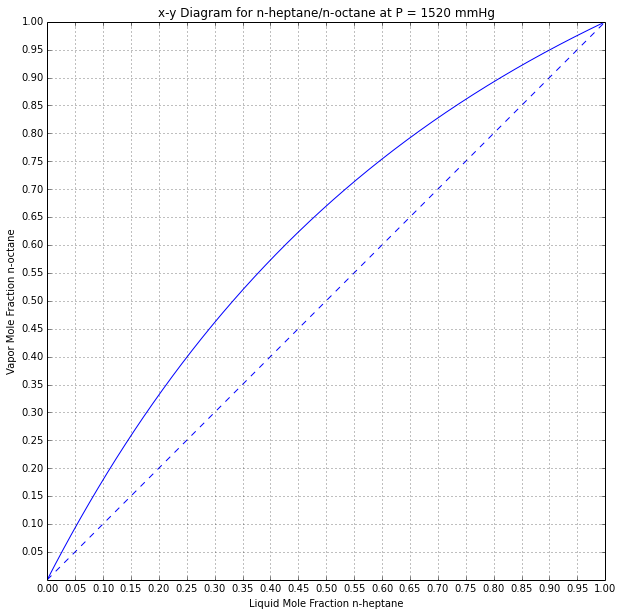

In [45]:
figure(figsize=(10,10))
plot(map(x,T),map(y,T))

plot([0,1],[0,1],'b--')
axis('equal')
xticks(linspace(0,1.0,21))
yticks(linspace(0.05,1.0,20))

title('x-y Diagram for {:s}/{:s} at P = {:.0f} mmHg'.format(A,B,P))
xlabel('Liquid Mole Fraction {:s}'.format(A))
ylabel('Vapor Mole Fraction {:s}'.format(B))

xlim(0,1)
ylim(0,1)
grid();

savefig('xy Diagram.png')

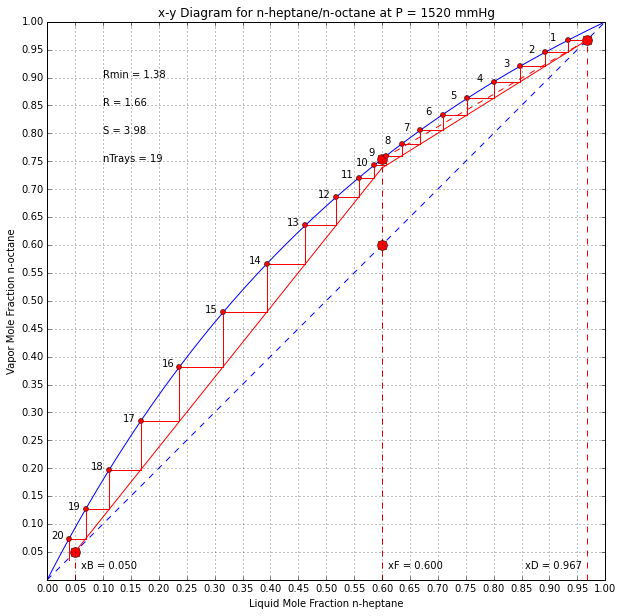

In [12]:
plt.figure(figsize=(10,10))
plt.plot(map(x,T),map(y,T))

plt.plot([0,1],[0,1],'b--')
plt.axis('equal')
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(0.05,1.0,20))

plt.title('x-y Diagram for {:s}/{:s} at P = {:.0f} mmHg'.format(A,B,P))
plt.xlabel('Liquid Mole Fraction {:s}'.format(A))
plt.ylabel('Vapor Mole Fraction {:s}'.format(B))

plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

xB = 0.05
xF = 0.60
xD = 0.96666

Tbub = fsolve(lambda T:x(T) - xF,100)
yF = y(Tbub)

plt.plot([xB,xB],[0,xB],'r--')
plt.plot(xB,xB,'ro',ms=10)
plt.text(xB+0.01,0.02,'xB = {:0.3f}'.format(float(xB)))

plt.plot([xF,xF,xF],[0,xF,yF],'r--')
plt.plot([xF,xF],[xF,yF],'ro',ms=10)
plt.text(xF+0.01,0.02,'xF = {:0.3f}'.format(float(xF)))

plt.plot([xD,xD],[0,xD],'r--')
plt.plot(xD,xD,'ro',ms=10)
plt.text(xD-0.11,0.02,'xD = {:0.3f}'.format(float(xD)))

plt.plot([xD,xF],[xD,yF],'r--')
Eslope = (xD-yF)/(xD-xF)
Rmin = Eslope/(1-Eslope)
R = 1.2*Rmin

zF = xD-R*(xD-xF)/(R+1)
plt.plot([xD,xF],[xD,zF],'r-')

Sslope = (zF-xB)/(xF-xB)
S = 1/(Sslope-1)
plt.plot([xB,xF],[xB,xB + (S+1)*(xF-xB)/S],'r-')

xP = xD
yP = xD

nTray = 0

while xP > xB:
    nTray += 1
    Tdew = fsolve(lambda T:y(T) - yP, 100)
    xQ = xP
    xP = x(Tdew)
    plt.plot([xQ,xP],[yP,yP],'r')
    plt.plot(xP,yP,'ro',ms=5)
    plt.text(xP-0.03,yP,nTray)
    
    yQ = yP
    yP = min([xD - (R/(R+1))*(xD-xP),xB + ((S+1)/S)*(xP-xB)])
    plt.plot([xP,xP],[yQ,yP],'r')

nTray -= 1

plt.text(0.1,0.90,'Rmin = {:0.2f}'.format(float(Rmin)))
plt.text(0.1,0.85,'R = {:0.2f}'.format(float(R)))
plt.text(0.1,0.80,'S = {:0.2f}'.format(float(S)))
plt.text(0.1,0.75,'nTrays = {:d}'.format(int(nTray)))

plt.savefig('xy Diagram Soln.png')

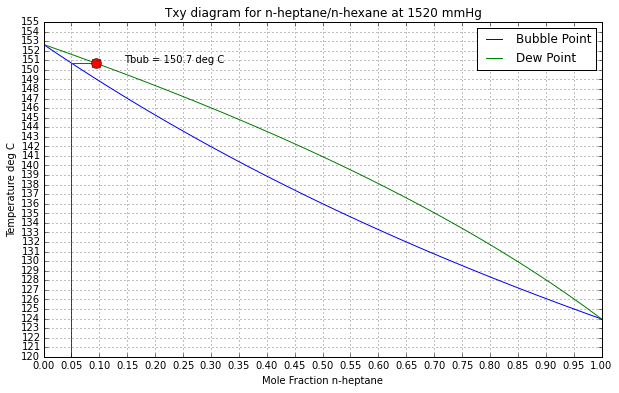

In [14]:
x = lambda T: (P-Psat[B](T))/(Psat[A](T)-Psat[B](T))
y = lambda T: x(T)*Psat[A](T)/P

plt.figure(figsize=(10,6))

plt.plot(map(x,T),T,map(y,T),T)
plt.xlabel('Mole Fraction n-heptane')
plt.ylabel('Temperature deg C')
plt.title('Txy diagram for n-heptane/n-hexane at 1520 mmHg')
plt.legend(['Bubble Point','Dew Point'])
plt.grid()

plt.ylim(120,155)
plt.xlim(0,1)
plt.xticks(np.linspace(0,1.0,21))
plt.yticks(np.linspace(120,155,36));

Tbub = fsolve(lambda T: x(T)-xB, 138)
ax = plt.axis()
plt.plot([xB,xB,y(Tbub)],[ax[2],Tbub,Tbub],'r-')
plt.plot(y(Tbub),Tbub,'ro',ms=10)
plt.text(y(Tbub)+0.05,Tbub,'Tbub = {:5.1f} deg C'.format(float(Tbub)))

plt.savefig('Txy Diagram Reboiler.png')